In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
dataset = pd.read_csv('insurance.csv')

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
dataset.describe()
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520


In [5]:
dataset.sex = dataset.sex.replace(['female', 'male'], [0,1])
dataset.smoker = dataset.smoker.replace(['no', 'yes'], [0,1])
dataset.region = dataset.region.replace(['southeast', 'southwest', 'northeast','northwest'],[1,2,3,4])

In [19]:
x = dataset.drop(['charges'], axis=1)
y = dataset.charges

In [20]:
x2 = sm.add_constant(x)
review = sm.OLS(y, x2).fit()
review.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     667.1
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:20:04   Log-Likelihood:                -13549.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.321e+04   1118.292    -11.809      0.000   -1.54e+04    -1.1e+04
age          256.9680     11.898     21.598      0.000     233.628     280.308
sex         -128.9561    333.008     -0.387      0.699    -782.233     524.321
bmi          337.0245     28.397     11.868      0.000     281.317     392.732
children     468.3540    137.745      3.400      0.001     198.134     738.574
smoker      2.387e+04    412.691     57.833      0.000    2.31e+04    2.47e+04
region       297.8372    152.286      1.956      0.051      -0.909     596.584
==============================================================================
Omnibus:                      300.491   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.279
Skew:                           1.213   Prob(JB):                    2.90e-156
Kurtosis:                       5.638   Cond. No.                         348.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
x = dataset.drop(['sex','region', 'charges'], axis=1)
x.head()

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [23]:
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [24]:
ml.coef_

array([  254.97145832,   320.6190203 ,   430.54569459, 23587.5571278 ])

In [25]:
ml.intercept_

-11910.538156786197

In [26]:
ml.score(x_test, y_test)

0.7978274606303822

In [15]:
predicted = ml.predict(x_test)
predicted

array([11461.21778356,  9920.2467051 , 37782.65091804, 15948.07879991,
        6880.17953405,  3611.72298504,  1116.03761213, 14050.36635496,
        8755.91494642,  7245.24400051,  4141.88989561, 10105.75686073,
        9070.28895257,  4297.76835129, 27698.89042419, 11158.3034547 ,
       11185.20391622,  5566.17742364,  8020.78118255, 26614.64277528,
       33491.40334294, 14072.29016492, 11247.08992767, 32583.50484706,
        4526.13824173,  8649.40532691,   772.16553719, 10160.3849297 ,
        4246.31063366, 10201.54588088,  8778.51695222, 40341.14720167,
       15888.84361834, 14071.98150805, 24375.43626726,  4693.49482979,
       12917.26831998, 30917.29783745, 33245.25708334,  3865.50438555,
        3634.32499084,  4441.72956167, 30088.45417165, 39174.930838  ,
       28081.31611876,  4782.78344047, 11052.499178  ,  7665.89830648,
        3205.13568791, 10741.82476894,  5132.18752728,  3180.44587201,
       33323.52723342, 37851.13513126, 16314.94956658,  6589.79766046,
      

Text(0.5, 1.0, 'Test vs Predicted')

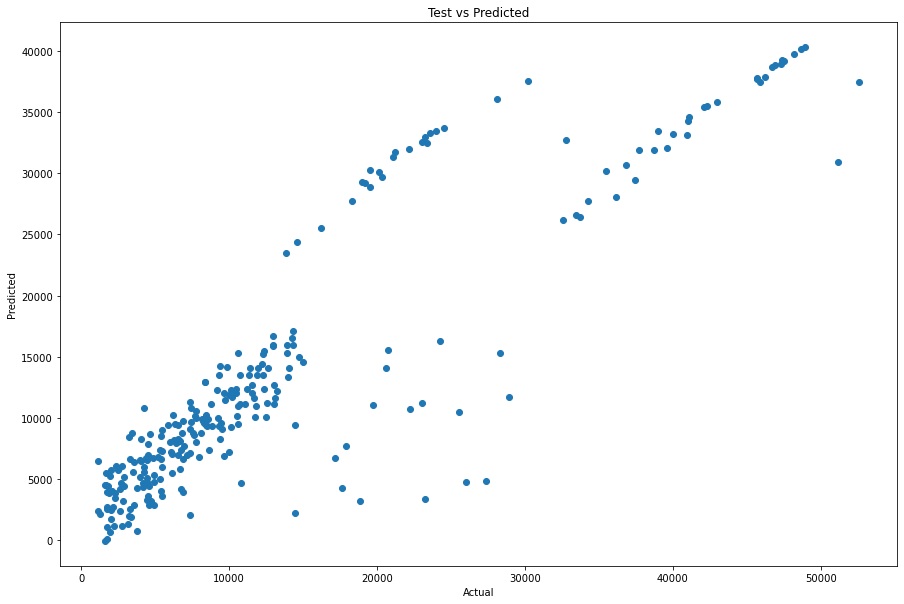

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test vs Predicted')